In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../galess")
import lens_plot
import HOD

/Users/giofer/anaconda3/envs/hmf/lib/python3.12/site-packages/halomod/halo_exclusion.py:18: UserWarning: Warning: Some Halo-Exclusion models have significant speedup when using Numba
  warnings.warn(


In [8]:
if(0):
    z = 1.7
    M_sat, M_min, sigma_logM, alpha = 10**14.18, 10**12.46, 0.2, 1.0
    z_array = np.array([1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2])
    N_z_nrm = np.array([0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
else:
    z = 2.9
    M_sat, M_min, sigma_logM, alpha = 10**12.55, 10**11.71, 0.2, 1.0
    data = [
            [2.000000e+00, 2.017570e-02],
            [2.100000e+00, 5.120140e-02],
            [2.200000e+00, 8.963850e-02],
            [2.300000e+00, 1.257240e-01],
            [2.400000e+00, 1.558000e-01],
            [2.500000e+00, 2.025050e-01],
            [2.600000e+00, 2.320880e-01],
            [2.700000e+00, 3.334470e-01],
            [2.800000e+00, 3.349540e-01],
            [2.900000e+00, 4.237170e-01],
            [3.000000e+00, 4.196420e-01],
            [3.100000e+00, 4.230910e-01],
            [3.200000e+00, 4.523410e-01],
            [3.300000e+00, 3.643720e-01],
            [3.400000e+00, 1.837830e-01],
            [3.500000e+00, 4.229380e-02],
            [3.600000e+00, 3.679960e-02],
            [3.700000e+00, 3.273170e-02],
            [3.800000e+00, 5.401130e-02],
            [3.900000e+00, 2.088890e-02],
            [4.000000e+00, 1.080040e-02]
            ]
    z_array = np.array([row[0] for row in data])
    N_z_nrm = np.array([row[1] for row in data])


M_h_array, HMF_array, nu_array, hmf_k, hmf_PS = HOD.init_lookup_table(z)
NTOT = HOD.N_tot(M_h_array, M_sat, alpha, M_min, sigma_logM)
N_g_AVG = HOD.get_AVG_N_tot(M_min, sigma_logM, M_sat, alpha, z)
M_h_AVG = HOD.get_AVG_Host_Halo_Mass(M_min, sigma_logM, M_sat, alpha, z)
b_eff = HOD.get_EFF_gal_bias(M_min, sigma_logM, M_sat, alpha, z, USE_MY_BIAS = 0)
f_sat = HOD.get_AVG_f_sat(M_min, sigma_logM, M_sat, alpha, z)
n_avg = HOD.get_N_dens_avg(z_array, M_min, sigma_logM, M_sat, alpha, z, N_z_nrm)

print(f'redshift z   : {z:.2f}')
print(f'n_avg        : {n_avg:.2e}')
print(f'N_g_AVG      : {N_g_AVG:.2e}')
print(f'log(M_h_AVG) : {np.log10(M_h_AVG):.2f}')
print(f'b_eff        : {b_eff:.2f}')
print(f'log(f_sat)   : {np.log10(f_sat):.2f}')

Calculating HMF table at redshift 2.90


/Users/giofer/anaconda3/envs/hmf/lib/python3.12/site-packages/hmf/mass_function/fitting_functions.py:1600: RuntimeWarning: divide by zero encountered in log10
  ngtm_behroozi = 10 ** (theta + np.log10(ngtm_tinker))


Calculating HMF table at redshift 2.30
Calculating HMF table at redshift 2.40
Calculating HMF table at redshift 2.50
Calculating HMF table at redshift 2.60
Calculating HMF table at redshift 2.70
Calculating HMF table at redshift 2.80
Calculating HMF table at redshift 3.00
Calculating HMF table at redshift 3.10
Calculating HMF table at redshift 3.20
Calculating HMF table at redshift 3.30
Calculating HMF table at redshift 3.40
Calculating HMF table at redshift 3.50
Calculating HMF table at redshift 3.60
Calculating HMF table at redshift 3.70
Calculating HMF table at redshift 3.80
Calculating HMF table at redshift 3.90
Calculating HMF table at redshift 4.00
redshift z   : 2.90
n_avg        : 5.93e-03
N_g_AVG      : 6.22e-04
log(M_h_AVG) : 12.04
b_eff        : 3.72
log(f_sat)   : -0.70


In [5]:
_theta_arcsec = np.logspace(-1,3.333334,14)
theta = _theta_arcsec * 1/206265 # 1 arcsec in rad
omega1h, omega2h = HOD.omega_array(theta, M_min, sigma_logM, M_sat, alpha, z, N_z_nrm, z_array, USE_MY_PS = False)

  0%|          | 0/14 [00:00<?, ?it/s]

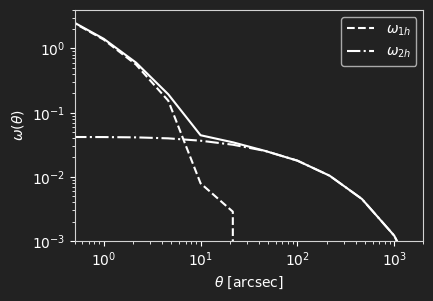

In [9]:
___PLOT_FOR_KEYNOTE___ = 1
COL = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'
line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
ax.plot(_theta_arcsec, omega1h, c = COL,ls = '--', label=r'$\omega_{1h}$')
ax.plot(_theta_arcsec, omega2h, c = COL,ls = '-.', label=r'$\omega_{2h}$')
ax.plot(_theta_arcsec, omega1h+omega2h, c = COL,ls = '-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((1e-3,4e0)) if z < 3.7 else ax.set_ylim((1e-2,4e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()